 <font face="Times New Roman" size="10" style='color:red'><b> <center>Ordinary Least Squared Problem</font></center></b>

#### Import delle librerie

In [1]:
import numpy as np
import numpy.linalg as linalge
import matplotlib.pyplot as plt

# Generazione dei dati

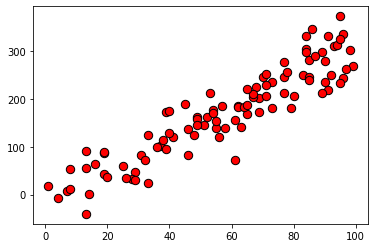

In [27]:
alpha_0 = 2
alpha_1 = 3
n = 100  #numero elementi
m = 1  #grado del polinomio
X = np.random.randint(0, 100, n)
Y = np.array(
    list(
        map(
            lambda x: alpha_0 + (alpha_1 * (x)) +
            (np.random.normal(loc=0, scale=40)),X)))

#matrice di Vandermonde
A = np.full((n, m + 1), 1)
for i in range(1, m + 1):
    A[:, i] = np.power(X, i)

plt.scatter(X, Y, marker='o', color='red', edgecolor='black', s=70)
plt.show()

**Nota**: Le variabili response sono generate in maniera lineare, tramite la funzione: $$y=\alpha_0 + \alpha_1x$$ 

# Risoluzione tramite i tre metodi numerici 

## <font style='color:black'>Risoluzione tramite il sistema delle equazioni normali $$   (A^T) * A$$</font>

il valore di alpha_0 è: -13.405736270147136
il valore di alpha_1 è : 3.2110030595629127


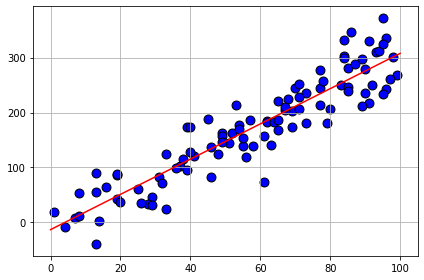

In [28]:
AT_A = A.T.dot(A)
AT_y = A.T.dot(Y)

coeff = linalge.solve(AT_A, AT_y) #coefficienti calcolati dal sistema delle equazioni normali
f_a = lambda x: coeff[0] + (coeff[1] * x) #+ coeff[2] * (x**2) + coeff[3] * (x**3) uncomment for the 3-rd grade
print('il valore di alpha_0 è:', coeff[0])
print('il valore di alpha_1 è :', coeff[1])

x = np.linspace(0, 100, n)
plt.scatter(X, Y, marker='o',color='blue',edgecolor='black', s=80)
plt.plot(x,f_a(x), color='red')
plt.grid()
plt.tight_layout()
plt.show()

## Risoluzione attraverso la QR Factorization

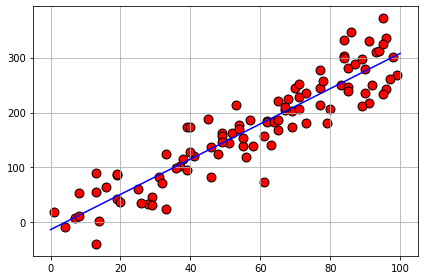

In [29]:
Q, R = linalge.qr(A)
C = Q.transpose().dot(Y)
QR_alpha = np.linalg.solve(R, C)

x = np.linspace(0, 100, n)
f_QR = lambda x: QR_alpha[0] + (QR_alpha[1] * x) #+ (QR_alpha[2] * x**2) + (QR_alpha[3] * x**3) uncomment for 3-rd grade

plt.scatter(X,Y, marker='o',color='red',edgecolor='black', s=80)
plt.plot(x,f_QR(x), color='blue')
plt.grid()
plt.tight_layout()
plt.show()


## Risoluzione attraverso la SVD Factorization

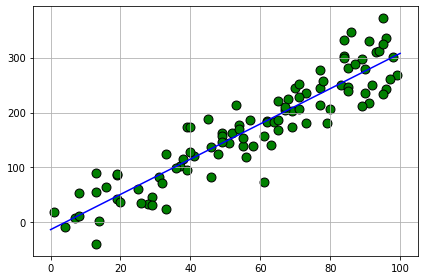

In [30]:
U, S, V = linalge.svd(A)

U_T = U.transpose().dot(Y)
Z = np.array([(u_i / s_i) for (u_i, s_i) in zip(U_T, S)])
SVD_alpha = linalge.solve(V, Z)

x = np.linspace(0, 100, n)
f_svd = lambda x: SVD_alpha[0] + (SVD_alpha[1] * x) # + (SVD_alpha[2] * x**2) + (SVD_alpha[3] * x**3) uncomment for 3-rd grade

plt.scatter(X, Y, marker='o', color='green', edgecolor='black', s=80)
plt.plot(x, f_svd(x), color='blue')
plt.grid()
plt.tight_layout()
plt.show()

# Discussione dei risultati

Possiamo notare che, indipendentemente dal metodo di approssimazione usato, i *coefficienti* restano i **medesimi**. 

In [31]:
print(f'Parametri ottenuti con la A^T * A  {coeff}')
print(f'Parametri ottenuti con la QR {QR_alpha}')
print(f'Parametri ottenuti con la SVD  {SVD_alpha}')

Parametri ottenuti con la A^T * A  [-13.40573627   3.21100306]
Parametri ottenuti con la QR [-13.40573627   3.21100306]
Parametri ottenuti con la SVD  [-13.40573627   3.21100306]


Per quanto riguarda i residui, che abbiamo calcolato utilizzando la norma euclidea al quadrato $$ \lvert\lvert y -\hat{y}   \rvert\rvert^2_{2}  $$ possiamo affermare che anche questi restano i medesimi.

In [32]:
print('Residuo normalizzato calcolato con A^T * A: ', np.linalg.norm(Y - f_a(X))**2)
print('Residuo normalizzato calcolato con la QR: ', np.linalg.norm(Y - f_QR(X))**2)
print('Residuo normalizzato calcolato con la SVD: ', np.linalg.norm(Y - f_svd(X))**2)

Residuo normalizzato calcolato con A^T * A:  133293.64120647343
Residuo normalizzato calcolato con la QR:  133293.64120647343
Residuo normalizzato calcolato con la SVD:  133293.64120647343


# Confronto e analisi dei risultati con librerie built-in di Python

Ciò che andremo ad effettuare adesso è un calcolo dell'approssimazione ai minimi quadrati attraverso librerie built-in di Python

In [38]:
print('Valori calcolati dal metodo lstsq', np.linalg.lstsq(A, Y, rcond=None)[0])
print(f'\nParametri ottenuti con la A^T * A  {coeff}')
print(f'Parametri ottenuti con la QR {QR_alpha}')
print(f'Parametri ottenuti con la SVD  {SVD_alpha}')

Valori calcolati dal metodo lstsq [-13.40573627   3.21100306]

Parametri ottenuti con la A^T * A  [-13.40573627   3.21100306]
Parametri ottenuti con la QR [-13.40573627   3.21100306]
Parametri ottenuti con la SVD  [-13.40573627   3.21100306]


Possiamo dire che i valori ottenuti con il metodo built-in di Numpy sono gli stessi di quelli calcolati con i metodi implementati

In [40]:
print('Il residuo calcolato dal metodo built-in:', np.linalg.lstsq(A, Y, rcond=None)[1])
print('\nResiduo normalizzato calcolato con A^T * A: ', np.linalg.norm(Y - f_a(X))**2)
print('Residuo normalizzato calcolato con la QR: ', np.linalg.norm(Y - f_QR(X))**2)
print('Residuo normalizzato calcolato con la SVD: ', np.linalg.norm(Y - f_svd(X))**2)

Il residuo calcolato dal metodo built-in: [133293.64120647]

Residuo normalizzato calcolato con A^T * A:  133293.64120647343
Residuo normalizzato calcolato con la QR:  133293.64120647343
Residuo normalizzato calcolato con la SVD:  133293.64120647343


Il residuo coincide con quello calcolato attraverso i tre metodi suddetti

#  Incremento della dimensionalità

### n = 100000, m = 1

In [10]:
alpha_0 = 2
alpha_1 = 3
n = 100000 #numero elementi
m = 1  #grado del polinomio
X = np.random.randint(0, 100, n)
Y = np.array(
    list(
        map(
            lambda x: alpha_0 + (alpha_1 * x) +
            (np.random.normal(loc=0, scale=30)), X)))

A = np.full((n, m + 1), 1)
for i in range(1, m + 1):
    A[:, i] = np.power(X, i)


Q, R = linalge.qr(A)
C = Q.transpose().dot(Y)
QR_alpha = np.linalg.solve(R, C)

f_QR = lambda x: QR_alpha[0] + (QR_alpha[1] * x) #+ QR_alpha[2] * (x**2)

print('Residuo normalizzato calcolato con la QR(n=100000): ', np.linalg.norm(Y - f_QR(X))**2)


Residuo normalizzato calcolato con la QR(n=100000):  90191309.86724232


+ Se aumentiamo il numero di dati, nel caso di una regressione lineare semplice (m=1) otteniamo un residuo normalizzato molto più alto rispetto al caso precedente

### n = 100000, m = 3

In [11]:
alpha_0 = 2
alpha_1 = 3
n = 1000000  #numero elementi
m = 3  #grado del polinomio
X = np.random.randint(0, 100, n)
Y = np.array(
    list(
        map(
            lambda x: alpha_0 + (alpha_1 * x) +
            (np.random.normal(loc=0, scale=30)), X)))

A = np.full((n, m + 1), 1)
for i in range(1, m + 1):
    A[:, i] = np.power(X, i)


Q, R = linalge.qr(A)
C = Q.transpose().dot(Y)
QR_alpha = np.linalg.solve(R, C)

f_QR = lambda x: QR_alpha[0] + (QR_alpha[1] * x) #+ QR_alpha[2] * (x**2)

print('Residuo normalizzato calcolato con la QR(n=1000000) (m=3): ', np.linalg.norm(Y - f_QR(X))**2)


Residuo normalizzato calcolato con la QR(n=1000000) (m=3):  899814659.631152


+ E' chiaro che se aumentiamo il grado del polinomio di miglior approssimazione al **grado *3*** otteniamo un residuo più alto rispetto al precedente poichè la relazione in input dei nostri dati è una relazione lineare

### n = 100000,  y definita come polinomio di secondo grado, m=1 / m=2

In [12]:
alpha_0 = 2
alpha_1 = 3
alpha_2 = 7
n = 1000000  #numero elementi
m = 1  #grado del polinomio
X = np.random.randint(0, 100, n)
Y = np.array(
    list(
        map(
            lambda x: alpha_0 + (alpha_1 * x) + (alpha_2 * (x**2)) +
            (np.random.normal(loc=0, scale=30)), X)))

A = np.full((n, m + 1), 1)
for i in range(1, m + 1):
    A[:, i] = np.power(X, i)


Q, R = linalge.qr(A)
C = Q.transpose().dot(Y)
QR_alpha = np.linalg.solve(R, C)

f_QR = lambda x: QR_alpha[0] + (QR_alpha[1] * x) 

print('Residuo normalizzato (m=1) calcolato con la QR(n=1000000) su y polinomiale: ', np.linalg.norm(Y - f_QR(X))**2)


Residuo normalizzato (m=1) calcolato con la QR(n=1000000) su y polinomiale:  27209617377226.297


In [13]:
alpha_0 = 2
alpha_1 = 3
alpha_2 = 7
n = 1000000  #numero elementi
m = 2  #grado del polinomio
X = np.random.randint(0, 100, n)
Y = np.array(
    list(
        map(
            lambda x: alpha_0 + (alpha_1 * x) + (alpha_2 * (x**2)) +
            (np.random.normal(loc=0, scale=30)), X)))

A = np.full((n, m + 1), 1)
for i in range(1, m + 1):
    A[:, i] = np.power(X, i)


Q, R = linalge.qr(A)
C = Q.transpose().dot(Y)
QR_alpha = np.linalg.solve(R, C)

f_QR = lambda x: QR_alpha[0] + (QR_alpha[1] * x) + QR_alpha[2] * (x**2)

print('Residuo normalizzato (m=2) calcolato con la QR(n=1000000) su y polinomiale: ', np.linalg.norm(Y - f_QR(X))**2)


Residuo normalizzato (m=2) calcolato con la QR(n=1000000) su y polinomiale:  900658296.3464588


+ Definendo in partenza la relazione polinomiale della variabile *response*, possiamo notare la presenza di un valore molto alto di residuo, applicando una regressione lineare, in contrapposizione ad un valore molto più basso con regressione polinomiale di secondo grado. Questo a riprova del fatto che un polinomio approssima meglio i dati

# Modifica del tipo di rumore

#### varianza = 20

In [14]:
alpha_0 = 2
alpha_1 = 3
n = 100  #numero elementi
m = 1  #grado del polinomio
X = np.random.randint(0, 100, n)
Y = np.array(
    list(
        map(
            lambda x: alpha_0 + (alpha_1 * x) +
            (np.random.normal(loc=0, scale=20)), X)))

A = np.full((n, m + 1), 1)
for i in range(1, m + 1):
    A[:, i] = np.power(X, i)


Q, R = linalge.qr(A)
C = Q.transpose().dot(Y)
QR_alpha = np.linalg.solve(R, C)

x = np.linspace(0, 100, n)
f_QR = lambda x: QR_alpha[0] + (QR_alpha[1] * X) #+ QR_alpha[2] * (x**2)


print('Residuo normalizzato calcolato con la QR: ', np.linalg.norm(Y - f_QR(X))**2)



Residuo normalizzato calcolato con la QR:  42306.72738448155


#### varianza = 50

In [15]:
alpha_0 = 2
alpha_1 = 3
n = 100  #numero elementi
m = 1  #grado del polinomio
X = np.random.randint(0, 100, n)
Y = np.array(
    list(
        map(
            lambda x: alpha_0 + (alpha_1 * x) +
            (np.random.normal(loc=0, scale=50)), X)))

A = np.full((n, m + 1), 1)
for i in range(1, m + 1):
    A[:, i] = np.power(X, i)

Q, R = linalge.qr(A)
C = Q.transpose().dot(Y)
QR_alpha = np.linalg.solve(R, C)

f_QR = lambda x: QR_alpha[0] + (QR_alpha[1] * X) #+ QR_alpha[2] * (x**2)


print('Residuo normalizzato calcolato con la QR: ', np.linalg.norm(Y - f_QR(X))**2)



Residuo normalizzato calcolato con la QR:  298346.8107018674


+ Come si può evincere dai risultati precedenti, aumentando la varianza dell'errore, i residui aumentano: questo indica che il modello di regressione lineare approssima *peggio* i dati nel caso di varianza alta

#### Modifica della funzione di distribuzione del rumore

In [16]:
alpha_0 = 2
alpha_1 = 3

n = 100  #numero elementi
m = 1  #grado del polinomio
X = np.random.randint(0, 100, n)
Y = np.array(
    list(
        map(
            lambda x: alpha_0 + (alpha_1 * x) + 
            (np.random.beta(a=2, b=3)), X)))

A = np.full((n, m + 1), 1)
for i in range(1, m + 1):
    A[:, i] = np.power(X, i)


Q, R = linalge.qr(A)
C = Q.transpose().dot(Y)
QR_alpha = np.linalg.solve(R, C)

f_QR = lambda x: QR_alpha[0] + (QR_alpha[1] * x)
print('Residuo normalizzato (m=1) calcolato con la QR(n=100) su y polinomiale: ', np.linalg.norm(Y - f_QR(X))**2)


Residuo normalizzato (m=1) calcolato con la QR(n=100) su y polinomiale:  3.7083751190823455


+ Se il residuo non fosse estratto da una normale, ma da una *beta* con *a=2* e *b=3*, avremmo un residuo basso

# Ulteriori analisi

#### 1. Utilizzando un numero di *n* pari a **1000000**, possiamo notare che con la risoluzione del *sistema normale* otteniamo un valore di residuo molto *alto* rispetto ad esempio al calcolo con la *SVD*

In [17]:
alpha_0 = 2
alpha_1 = 3
n = 1000000  #numero elementi
m = 1  #grado del polinomio
X = np.random.randint(0, 100, n)
Y = np.array(
    list(
        map(
            lambda x: alpha_0 + (alpha_1 * (x**m)) +
            (np.random.normal(loc=0, scale=30)), X)))

#creazione della matrice di Vandermonde
A = np.full((n, m + 1), 1)
for i in range(1, m + 1):
    A[:, i] = np.power(X, i)
    
#risolvo col sistema di equazioni normali
AT_A = A.T.dot(A)
AT_y = A.T.dot(Y)
coeff = linalge.solve(AT_A, AT_y)
y_a = coeff[0] + coeff[1] * X
residuo_sistema = linalge.norm(Y - y_a)

#risolvo con la SVD
U, S, V = linalge.svd(A, full_matrices=False)
z = (U.transpose().dot(Y)) / S
SVD_alpha = V.transpose().dot(z)
ySVD = SVD_alpha[0] + SVD_alpha[1] * X

residuo_svd = linalge.norm(Y - ySVD)

print(f'Il residuo calcolato con il sistema delle equazioni normali è (n=1000000): {residuo_sistema}')
print(f'Il residuo calcolato con la SVD è (n=1000000): {residuo_svd}')

Il residuo calcolato con il sistema delle equazioni normali è (n=1000000): 111552.89473239705
Il residuo calcolato con la SVD è (n=1000000): 29992.579238007886


Possiamo concludere che il metodo delle *equazioni normali* risulta **peggiore** rispetto al metodo basato sulla *fattorizzazione SVD*

#### 2. Utilizzando un numero di n pari a **1000000**, possiamo notare che con la risoluzione del sistema normale otteniamo **coefficienti** completamente differenti rispetto al calcolo con la SVD o con il metodo built-in lstsq di Numpy


In [18]:
print(f'I coefficienti calcolati con la SVD sono: {SVD_alpha}')
print(f'I coefficienti calcolati con il metodo built-in di Numpy lstsq sono: {linalge.lstsq(A, Y, rcond=None)[0]}')
print(f'I coefficienti calcolati con il sistema delle equazioni normali sono: {coeff}')


I coefficienti calcolati con la SVD sono: [2.01564641 2.99971019]
I coefficienti calcolati con il metodo built-in di Numpy lstsq sono: [2.01564641 2.99971019]
I coefficienti calcolati con il sistema delle equazioni normali sono: [186.05777635  -0.72218837]


Questo a riconferma che il metodo delle equazioni normali risulti il *peggiore*  
Il metodo *lstsq* e il metodo *SVD* risultano essere i migliori nel caso in cui il numero di dati sia elevato

#### 3. Uso di un polinomio di grado elevato

Uso di un polinomio di grado *quattro* e applicazione dei tre metodi

##### Generazione dei dati

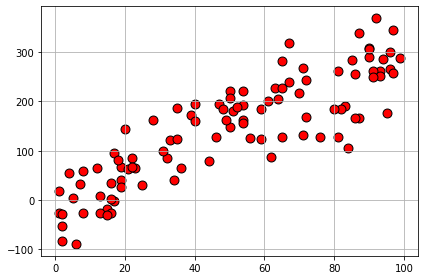

In [19]:
alpha_0 = 2
alpha_1 = 3
n = 100  #numero elementi
m = 5  #grado DUE del polinomio
X = np.random.randint(0, 100, n)
Y = np.array(
    list(
        map(
            lambda x: alpha_0 + (alpha_1 * (x)) +
            (np.random.normal(loc=0, scale=50)),X)))

#matrice di Vandermonde
A = np.full((n, m + 1), 1)
for i in range(1, m + 1):
    A[:, i] = np.power(X, i)

plt.scatter(X, Y, marker='o', color='red', edgecolor='black', s=80)
plt.grid()
plt.tight_layout()
plt.show()

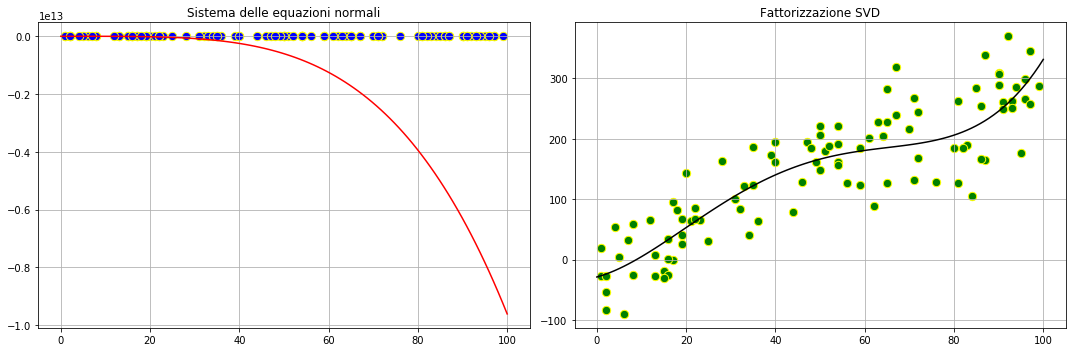

In [20]:
AT_A = A.T.dot(A)
AT_y = A.T.dot(Y)

coeff = linalge.solve(AT_A, AT_y)
f_a = lambda x: coeff[0] + (coeff[1] * x) + coeff[2] * (x**2) + coeff[3] * (x**3) + coeff[4] * (x**4)   

U, S, V = linalge.svd(A)

U_T = U.transpose().dot(Y)
Z = np.array([(u_i / s_i) for (u_i, s_i) in zip(U_T, S)])
SVD_alpha = linalge.solve(V, Z)

x = np.linspace(0, 100, n)
f_svd = lambda x: SVD_alpha[0] + (SVD_alpha[1] * x)  + (SVD_alpha[2] * x**2) + (SVD_alpha[3] * x**3) + (SVD_alpha[4] * x**4) 

plt.figure(figsize=[15, 5])
#istogramma residui con una variabile
plt.subplot(1, 2, 1)
plt.title("Sistema delle equazioni normali")
plt.scatter(X, Y, marker='o',color='blue',edgecolor='yellow', s=70)
plt.plot(x,f_a(x), color='red')
plt.grid()
plt.tight_layout()
plt.subplot(1, 2, 2)
plt.title("Fattorizzazione SVD")
plt.scatter(X, Y, marker='o',color='green',edgecolor='yellow', s=70)
plt.plot(x,f_svd(x), color='black')
plt.grid()
plt.tight_layout()
plt.show()

- Possiamo notare che con il sistema delle equazioni normali il metodo diventa instabile. Questo poichè la matrice di Vandermonde diventa *malcondizionata*, cioè per $$n\rightarrow\infty\quad det(A)\rightarrow 0 $$ e, dunque, solo metodi come la SVD riescono ad approssimare al meglio.